In [1]:
import matplotlib.pyplot as plot
import numpy as np
import odespy

%matplotlib inline

In [2]:
from pyclouds import cloud_microphysics, parameterisations
from pyclouds.common import Var, ATHAM_constants
from pyclouds.plotting import plot_hydrometeor_evolution
from unified_microphysics import constants as um_constants

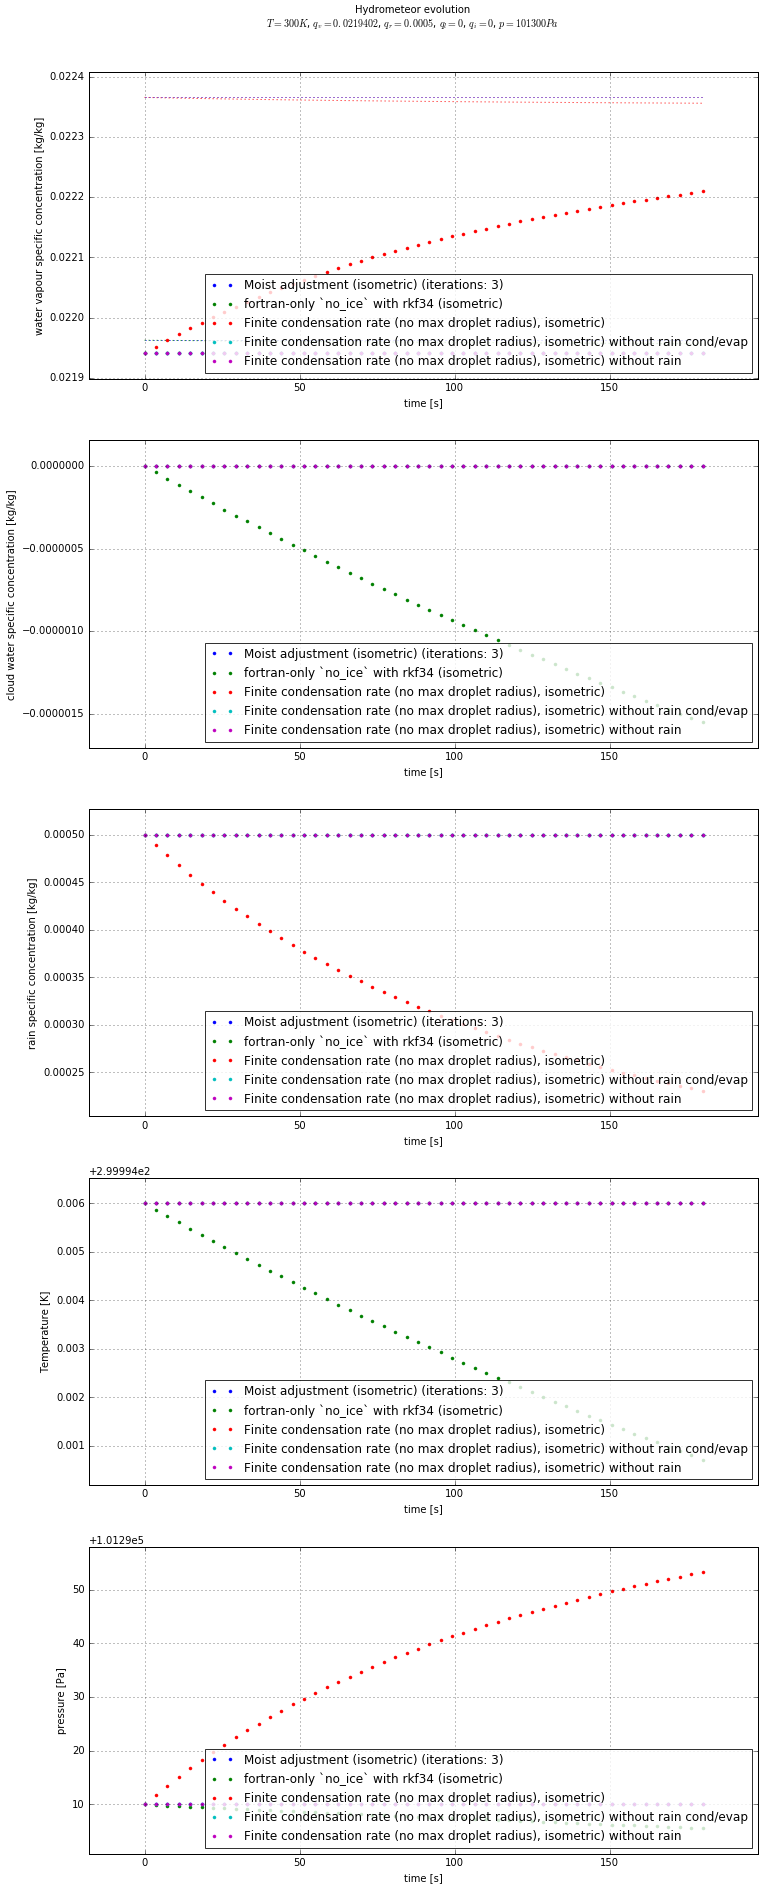

In [12]:
constants = um_constants

T0 = 300.
p0 = 101300.

qv_sat_f = parameterisations.ParametersationsWithSpecificConstants(constants=constants).pv_sat.qv_sat
qv_sat = qv_sat_f(T=T0, p=p0)

qv0 = 0.999*qv_sat
ql0 = 0.0
qr0 = 0.5e-3

initial_condition = Var.make_state(T=T0, p=p0, q_v=qv0, q_l=ql0, q_r=qr0)

t_ = np.linspace(0., 180., 50)

SolverClass = odespy.Euler


solutions = []
solutions.append(cloud_microphysics.MoistAdjustmentMicrophysics(constants=constants, model_constraint='isometric').integrate(initial_condition=initial_condition, t=t_, iterations=3))

solutions.append(cloud_microphysics.ExplicitFortranModel(model_constraint='isometric').integrate(initial_condition=initial_condition, t=t_))
solutions.append(cloud_microphysics.FiniteCondensationTimeMicrophysics(model_constraint='isometric').integrate(initial_condition=initial_condition, t=t_))
solutions.append(cloud_microphysics.FiniteCondensationTimeMicrophysics(model_constraint='isometric', disable_rain_condevap=True).integrate(initial_condition=initial_condition, t=t_))
solutions.append(cloud_microphysics.FiniteCondensationTimeMicrophysics(model_constraint='isometric', disable_rain=True).integrate(initial_condition=initial_condition, t=t_))



#sol2.plot()
plot = plot_hydrometeor_evolution(solutions, variables=['q_v', 'q_l', 'q_r', 'T', 'p',], initial_condition=initial_condition)